# ML_Model_for_Predicting_Ships_Crew_Size

#### This was a takehome quiz for a Data Scientist interview

Date: 4/8/2019

We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. This project is organized as follows: (a) data proprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

cruise_ship_info.csv: dataset used for model building.


### Preprocess Crew Size Data

#### Load the raw data into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
raw_data = pd.read_csv('cruise_ship_info.csv')

In [3]:
# set to show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# create a copy to prevent corruption of the original
df = raw_data.copy()

In [5]:
df.head(15)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


#### Get basic info and stats on dataset.

In [6]:
df.shape

(158, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [8]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [9]:
%matplotlib inline

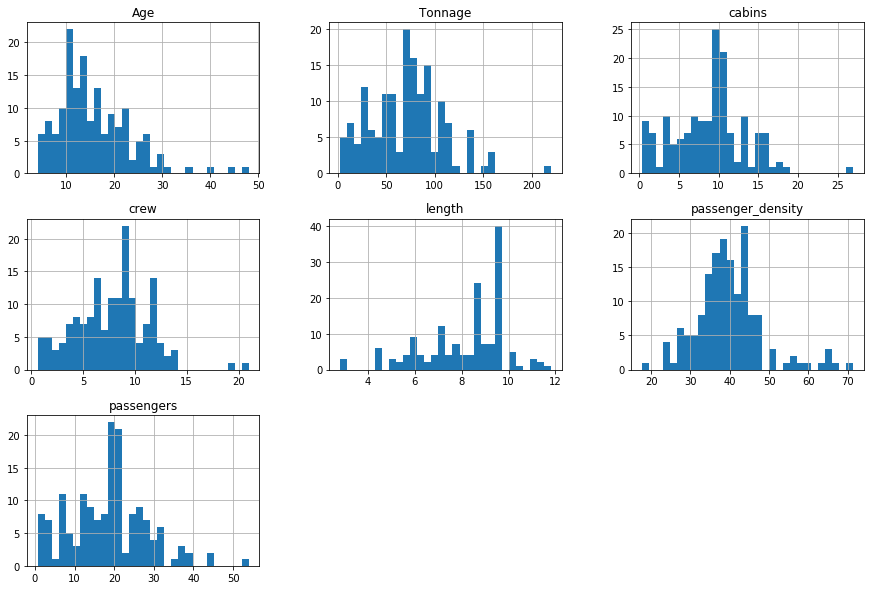

In [10]:
# Distributions
df.hist(bins=30, figsize=(15,10))
plt.show()

In [11]:
df[df.columns[:]].corr()['crew'][:]

Age                 -0.530657
Tonnage              0.927569
passengers           0.915234
length               0.895857
cabins               0.950823
passenger_density   -0.155509
crew                 1.000000
Name: crew, dtype: float64

#### Initial Observations
1. Identical ships with different names exist; they appear to have the same crew size. 
2. Intuitivley speaking, cuise line doesn't affect crew size the same way the as 
   measurement features do.  
3. Looking at rows 0,1,5,6,7 shows age has little no effect on similar or identical boats.
4. Age and pass_density have poor correlation cofficients.
5. The feature variable ranges are not very similar and the scaling is not uniform. Sklearn should handle scaling outomatically.

#### Feature Selection/Drop Columns
1. Drop 'Ship_name' column. _observation 1, but needs no explanation_
2. Drop 'Cruise_line' column. _observation 2_
3. Drop 'Age' column. _observation 3 & 4_
4. Drop 'passenger_density' column _observation 4_

In [12]:
df.drop(columns=['Ship_name', 'Cruise_line', 'Age', 'passenger_density'], inplace=True)

In [13]:
df.head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


NOTE: Only going to use numerical value features. No Need to label encode.

make Tonnage lowercase for uniformity

In [14]:
df = df.rename(columns={'Tonnage': 'tonnage'})
df.reset_index(drop=True, inplace=True)

In [15]:
df.head()

,tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


#### clean dataframe checkpoint - save to csv

In [16]:
clean_df = df.copy()

In [17]:
clean_df.head()

,tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [18]:
clean_df.to_csv('clean_df.csv')

#### Get features matrix (X) and target array (y)

In [19]:
y = np.array(clean_df['crew'])

In [20]:
y

array([ 3.55,  3.55,  6.7 , 19.1 , 10.  ,  9.2 ,  9.2 ,  9.2 ,  9.2 ,
       11.5 , 11.6 ,  6.6 ,  9.2 ,  9.2 ,  9.3 , 11.6 , 10.3 ,  9.2 ,
        9.3 ,  9.2 , 10.29, 10.  , 11.6 , 11.5 ,  8.58,  9.99,  9.09,
        9.99,  9.09,  9.99,  6.7 ,  9.99,  0.6 ,  6.7 ,  4.  ,  9.2 ,
        6.17,  6.36, 10.68, 10.68,  3.85,  9.2 ,  6.  , 10.9 ,  7.66,
        6.36,  5.45,  9.21, 12.53,  9.  ,  9.45,  9.45,  6.  ,  8.  ,
        5.57,  5.3 ,  8.42,  4.6 ,  6.44,  5.88,  5.88,  5.88,  5.61,
        6.12,  5.31,  8.  ,  7.  , 13.13,  7.  ,  5.35,  9.87,  7.4 ,
        2.97,  7.6 ,  4.7 , 11.  ,  6.14, 11.09, 11.  ,  4.38,  8.  ,
       10.  ,  6.3 , 13.  ,  3.8 ,  9.59,  6.14,  4.  ,  4.  ,  4.  ,
        3.5 ,  8.69,  5.2 ,  8.5 ,  9.  ,  7.94, 12.2 , 11.  ,  9.  ,
       12.  ,  9.  , 12.38, 12.  , 11.  , 11.1 ,  9.  ,  3.73,  6.96,
        5.2 , 12.38,  9.  , 12.  ,  9.  ,  3.73,  1.46,  4.45,  3.24,
        2.11,  4.47, 11.85,  8.48,  6.71,  7.6 , 11.76, 13.6 ,  7.6 ,
       13.6 ,  8.69,

In [21]:
X = clean_df.iloc[:, :-1 ]

In [22]:
X.head()

,tonnage,passengers,length,cabins
0,30.277,6.94,5.94,3.55
1,30.277,6.94,5.94,3.55
2,47.262,14.86,7.22,7.43
3,110.000,29.74,9.53,14.88
4,101.353,26.42,8.92,13.21


#### get the training and testing sets _use 60%/40%_

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(94, 4) (94,)
(64, 4) (64,)


### Build the linear regression model.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regr = LinearRegression()

In [28]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
regr.score(X_train, y_train)

0.920282609613996

### Evaluate the model
#### Compare predictions

In [30]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [31]:
np.column_stack((y_train_pred, y_train))

array([[ 3.70174845,  4.        ],
       [13.14974084, 11.85      ],
       [15.15469989, 13.6       ],
       [ 8.65046647,  9.45      ],
       [ 8.06481945,  7.94      ],
       [ 7.20769201,  7.6       ],
       [ 6.81722641,  5.31      ],
       [ 9.18852214,  9.        ],
       [11.41064465, 12.        ],
       [ 4.70400692,  5.35      ],
       [ 9.59744957,  9.        ],
       [11.2869091 , 12.53      ],
       [ 8.66318114,  9.2       ],
       [ 8.76970814,  7.6       ],
       [ 3.71048335,  3.73      ],
       [ 9.58866502, 10.29      ],
       [12.02235579, 11.6       ],
       [ 9.97604576, 11.        ],
       [ 6.6321777 ,  6.        ],
       [ 7.23043859,  6.14      ],
       [12.03769245, 19.1       ],
       [ 2.61376103,  1.8       ],
       [ 1.59948484,  1.6       ],
       [ 8.66318114,  9.2       ],
       [ 7.08126891,  7.        ],
       [13.14974084, 11.76      ],
       [ 3.7125439 ,  3.8       ],
       [ 7.40303204,  6.96      ],
       [ 8.66318114,

In [32]:
np.column_stack((y_test_pred, y_test))

array([[ 8.67270347,  9.2       ],
       [ 8.40360192,  7.66      ],
       [ 3.70748313,  3.73      ],
       [ 9.00302063,  8.48      ],
       [ 6.85163948,  6.12      ],
       [ 8.76970814,  7.6       ],
       [ 5.97143054,  6.71      ],
       [ 7.7498044 ,  7.2       ],
       [11.36526282, 12.38      ],
       [ 5.30599082,  5.2       ],
       [ 7.8138539 ,  8.58      ],
       [13.14974084, 11.76      ],
       [ 8.4279182 ,  9.09      ],
       [ 6.03968736,  5.88      ],
       [ 8.71133021,  8.        ],
       [11.24618097, 11.        ],
       [13.92986078, 13.6       ],
       [ 9.34143143,  9.        ],
       [ 1.59948484,  1.6       ],
       [ 8.83497172,  8.42      ],
       [ 6.18220579,  6.36      ],
       [ 6.01213193,  6.7       ],
       [ 6.03968736,  5.88      ],
       [ 8.66318114,  9.2       ],
       [ 3.91088736,  3.85      ],
       [ 7.00686708,  6.36      ],
       [11.36526282, 12.38      ],
       [ 8.66318114,  9.2       ],
       [ 1.59948484,

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

In [35]:
print("Train set MSE is: " + str(round(mse_train, 4)))
print("Test set MSE is: " + str(round(mse_test, 4)))

Train set MSE is: 0.9546
Test set MSE is: 0.8887


In [36]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred) 

In [37]:
print("Train set R^2 is: " + str(round(r2_train, 4)))
print("Test set R^2 is: " + str(round(r2_test, 4)))

Train set R^2 is: 0.9203
Test set R^2 is: 0.9283


#### Intercept and Coefficients

In [38]:
print("The Y intercept is: " + str(regr.intercept_))

The Y intercept is: -0.7525074496158339


In [39]:
print("The feature coefficients are:")
list(zip(X.columns, regr.coef_))

The feature coefficients are:


[('tonnage', 0.019027025057444476),
 ('passengers', -0.1500109930620908),
 ('length', 0.3787639472921977),
 ('cabins', 0.7761380147184815)]